## Main Learning Outcomes from the Rat Maze Markov Decision Problem

#### This problem is an application of Markov Chains, specifically absorbing Markov Chains, and helps in understanding the following key concepts:

#### 1. Markov Property: The rat’s movement depends only on the current room and not on past movements (i.e., memoryless property).

#### 2. Transition Matrix Representation: The maze is represented as a Markov Chain with a transition matrix, where each element indicates the probability of moving between rooms.

#### 3. Absorbing States: The states F (Food) and S (Shock) are absorbing states, meaning once entered, the rat stays there permanently.

#### 4. Steady-State and Absorption Probabilities: We can compute the probability that the rat will reach an absorbing state, given any starting room.

#### 5. Expected Steps Before Absorption: How many steps, on average, does it take for the rat to reach F or S?

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#Creating the transition matrix for the rat in the maze problem.
def create_transition_matrix():
    
    P = np.array([
        [1, 0, 0, 0, 0, 0],  # F (Food) is absorbing
        [1/2, 0, 0, 1/2, 0, 0],  # Room 2
        [1/3, 0, 0, 1/3, 1/3, 0],  # Room 3
        [0, 1/3, 1/3, 0, 0, 1/3],  # Room 4
        [0, 0, 1/2, 0, 0, 1/2],  # Room 5
        [0, 0, 0, 0, 0, 1]  # S (Shock) is absorbing
    ])
    return P

In [4]:
# Simulating the Markov chain for a given number of steps.
def simulate_markov_chain(P, start_state, num_steps):

    state = start_state
    states_visited = [state]
    
    for _ in range(num_steps):
        state = np.random.choice(len(P), p=P[state])
        states_visited.append(state)
        if state in [0, 5]:  # Absorbing states (F or S)
            break
    
    return states_visited

In [5]:
#Visualizes the Markov chain using NetworkX.
def visualize_markov_chain(P):
    
    states = ['F', '2', '3', '4', '5', 'S']
    G = nx.DiGraph()
    
    for i in range(len(P)):
        for j in range(len(P)):
            if P[i, j] > 0:
                G.add_edge(states[i], states[j], weight=P[i, j])
    
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)
    edge_labels = {(states[i], states[j]): f'{P[i, j]:.2f}' for i in range(len(P)) for j in range(len(P)) if P[i, j] > 0}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title("Markov Chain Representation of Rat Maze")
    plt.show()

In [6]:
# Initializing the transition matrix
P = create_transition_matrix()

In [7]:
# Simulating the Markov chain from room 3 for 10 steps
simulated_path = simulate_markov_chain(P, start_state=2, num_steps=10)
print("Simulated path:", ["F", "2", "3", "4", "5", "S"][simulated_path[-1]])

Simulated path: F


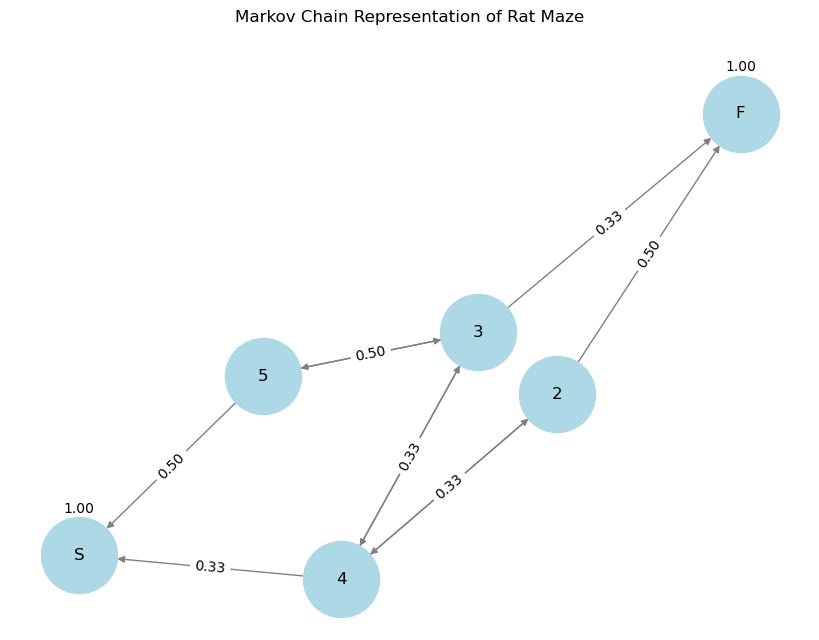

In [8]:
# Visualizing the Markov Chain
visualize_markov_chain(P)

In [9]:
# Simulating the Markov chain from room 3 for 10 steps
simulated_path = simulate_markov_chain(P, start_state=2, num_steps=10)
state_names = ["F", "2", "3", "4", "5", "S"]
print("Simulated path:", [state_names[state] for state in simulated_path])

Simulated path: ['3', '5', '3', '4', 'S']


In [10]:
#Visualizing the absorping properties
import numpy.linalg as la

def absorption_probabilities(P):
    """
    Computes the probability of absorption in each absorbing state (F or S)
    for a rat starting from a transient state.
    """
    Q = P[1:5, 1:5]  # Transition matrix for transient states (2, 3, 4, 5)
    R = P[1:5, [0, 5]]  # Absorbing state transitions to F (0) and S (5)
    
    # Fundamental matrix N = (I - Q)^-1
    I = np.eye(Q.shape[0])
    N = la.inv(I - Q)
    
    # Absorption probabilities B = N * R
    B = N @ R
    return B

B = absorption_probabilities(P)
print("Absorption probabilities (starting from rooms 2, 3, 4, 5):")
print(B)


Absorption probabilities (starting from rooms 2, 3, 4, 5):
[[0.71428571 0.28571429]
 [0.57142857 0.42857143]
 [0.42857143 0.57142857]
 [0.28571429 0.71428571]]
